In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
casas = pd.read_csv('/content/3LWxnSPoTikFflATrLPV_kc_house_data.csv (1).xls')

In [6]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [7]:
casas.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [8]:
casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999
mean,4549550315,533437,3,2,2053,16037,1,0,3,8,1750,303,1967,92,98078,48,-122,1976,13359
std,2863858862,377055,1,1,911,45043,1,1,1,1,811,451,28,418,54,0,0,672,27316
min,1000102,75000,0,0,380,572,1,0,1,3,380,0,1900,0,98001,47,-123,620,660
25%,2114000745,315000,3,2,1410,5428,1,0,3,7,1180,0,1950,0,98032,47,-122,1490,5418
50%,3905010100,445838,3,2,1890,7920,1,0,3,7,1530,0,1969,0,98065,48,-122,1830,7848
75%,7272000620,639950,4,2,2500,11176,2,0,4,8,2130,600,1990,0,98118,48,-122,2340,10374
max,9842300540,7700000,11,8,12050,1651359,4,4,5,13,8860,4820,2015,2015,98199,48,-121,5790,871200


In [9]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

'Considerando a base de dados kc_house_data.csv responda as questões de 1
a 6 abaixo:
1. Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total sqft_living superior a
2000 pés quadrados?

In [14]:
num_casas = casas.select_dtypes(include=['float64','int64'])
corr = num_casas.corr()

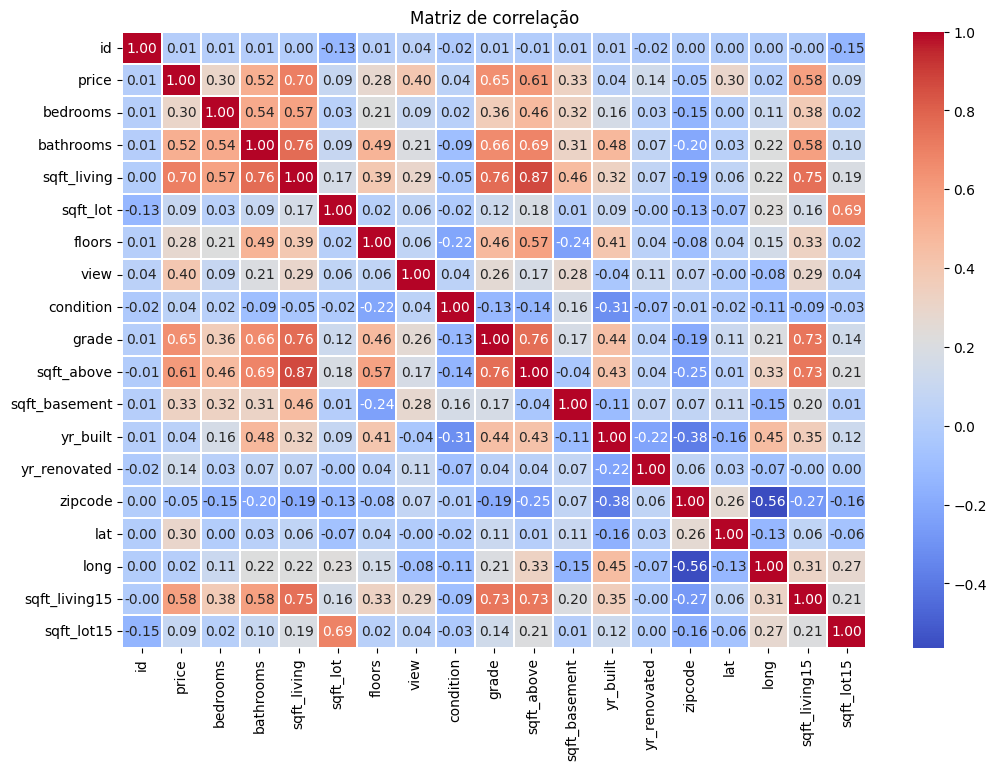

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.3)
plt.title('Matriz de correlação')
plt.show()

#Correlações:
#Positivas = sqft_living e bathrooms
#Neutras = sqft_lot, condition, sqft_living

In [16]:
#CORRIGIR, FAZER UMA CORRELAÇÃO COM 1 OU MAIS quartos, 2 OU MAIS
#correlacao = num_casas['price'].corr(num_casas['bedrooms'])
#print(f'A correlação entre o número de quartos e o preço é: {correlacao:.2f}')
def quarto(data, numeros):
    dado_quarto = casas[casas['bedrooms'] == numeros]
    corre_quarto = round(dado_quarto['price'].corr(dado_quarto['sqft_living']),4)
    return corre_quarto

In [17]:
for numeros in range(0,int(casas['bedrooms'].max())):
    print(f'A correlação do preço com a área de acordo com {numeros} quartos é: {quarto(casas,numeros)}')

A correlação do preço com a área de acordo com 0 quartos é: 0.8783
A correlação do preço com a área de acordo com 1 quartos é: 0.4705
A correlação do preço com a área de acordo com 2 quartos é: 0.6364
A correlação do preço com a área de acordo com 3 quartos é: 0.611
A correlação do preço com a área de acordo com 4 quartos é: 0.693
A correlação do preço com a área de acordo com 5 quartos é: 0.7506
A correlação do preço com a área de acordo com 6 quartos é: 0.8311
A correlação do preço com a área de acordo com 7 quartos é: 0.5737
A correlação do preço com a área de acordo com 8 quartos é: 0.7897
A correlação do preço com a área de acordo com 9 quartos é: -0.7685
A correlação do preço com a área de acordo com 10 quartos é: nan


In [18]:
def maisquartos(data,numeros):
    dataset = casas[casas['bedrooms'] >= numeros]
    correla_quarto = round(dataset['price'].corr(dataset['sqft_living']),4)
    return correla_quarto

In [19]:
for numeros in range(0,int(casas['bedrooms'].max())):
    print(f'A correlação do preço com a área de acordo com {numeros} ou mais quartos é: {maisquartos(casas,numeros)}')

A correlação do preço com a área de acordo com 0 ou mais quartos é: 0.7022
A correlação do preço com a área de acordo com 1 ou mais quartos é: 0.702
A correlação do preço com a área de acordo com 2 ou mais quartos é: 0.7021
A correlação do preço com a área de acordo com 3 ou mais quartos é: 0.7082
A correlação do preço com a área de acordo com 4 ou mais quartos é: 0.7224
A correlação do preço com a área de acordo com 5 ou mais quartos é: 0.7654
A correlação do preço com a área de acordo com 6 ou mais quartos é: 0.8051
A correlação do preço com a área de acordo com 7 ou mais quartos é: 0.5717
A correlação do preço com a área de acordo com 8 ou mais quartos é: 0.5741
A correlação do preço com a área de acordo com 9 ou mais quartos é: -0.0012
A correlação do preço com a área de acordo com 10 ou mais quartos é: nan


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [20]:
#correlação da área e preço
correlacao_area = num_casas['sqft_living'].corr(num_casas['price'])
print(f'A correlação entre a área e o preço é: {correlacao_area:.2f}')

A correlação entre a área e o preço é: 0.70


In [21]:
##correlação da área e preço com sqft_living superior a 2000 pés quadrados
maior = num_casas[num_casas['sqft_living'] > 2000]
correlacao_maior = maior['sqft_living'].corr(maior['price'])
print(f'A correlação entre áreas maiores que 2000 pés quadrados e o preço é: {correlacao_maior:.2f}')

A correlação entre áreas maiores que 2000 pés quadrados e o preço é: 0.69


2. Existe alguma correlação entre o preço price e a área total da casa
sqft_living, considerando apenas casas com pelo menos dois
banheiros bathrooms?

In [22]:
maior_dois = num_casas[num_casas['bathrooms'] >= 2]
correlacao_banheiros = maior_dois['sqft_living'].corr(maior_dois['price'])
print(f'A correlação entre ter 2 banheiros e o preço é: {correlacao_banheiros:.2f}')

A correlação entre ter 2 banheiros e o preço é: 0.71


3. Como a quantidade de banheiros bathrooms influencia na correlação
entre a área total da casa sqft_living e o preço price?

In [23]:
def banheiros(data, numeros):
    dado_banheiros = casas[casas['bathrooms'] == numeros]
    corre_banheiro = round(dado_banheiros['price'].corr(dado_banheiros['sqft_living']),4)
    return corre_banheiro

In [24]:
for numeros in range(0,int(casas['bathrooms'].max())):
    print(f'A correlação do preço com a área de acordo com {numeros} banheiros é: {banheiros(casas,numeros)}')

A correlação do preço com a área de acordo com 0 banheiros é: 0.9168
A correlação do preço com a área de acordo com 1 banheiros é: 0.3595
A correlação do preço com a área de acordo com 2 banheiros é: 0.4469
A correlação do preço com a área de acordo com 3 banheiros é: 0.569
A correlação do preço com a área de acordo com 4 banheiros é: 0.5845
A correlação do preço com a área de acordo com 5 banheiros é: 0.7472
A correlação do preço com a área de acordo com 6 banheiros é: 1.0
A correlação do preço com a área de acordo com 7 banheiros é: nan


In [25]:
def maisbanheiros(data,numeros):
    dataset = casas[casas['bathrooms'] >= numeros]
    correla_banheiros = round(dataset['price'].corr(dataset['sqft_living']),4)
    return correla_banheiros

In [26]:
for numeros in range(0,int(casas['bathrooms'].max())):
    print(f'A correlação do preço com a área de acordo com {numeros} ou mais banheiros é: {maisbanheiros(casas,numeros)}')

A correlação do preço com a área de acordo com 0 ou mais banheiros é: 0.7022
A correlação do preço com a área de acordo com 1 ou mais banheiros é: 0.7018
A correlação do preço com a área de acordo com 2 ou mais banheiros é: 0.7067
A correlação do preço com a área de acordo com 3 ou mais banheiros é: 0.7159
A correlação do preço com a área de acordo com 4 ou mais banheiros é: 0.7895
A correlação do preço com a área de acordo com 5 ou mais banheiros é: 0.8389
A correlação do preço com a área de acordo com 6 ou mais banheiros é: 0.8426
A correlação do preço com a área de acordo com 7 ou mais banheiros é: 0.9869


4. Qual é a relação entre a condição da casa condition e o preço price,
considerando apenas casas com uma área total sqft_living superior a
3000 pés quadrados?


In [27]:
tres = num_casas[num_casas['sqft_living'] > 3000]
correlacao_tres = tres['condition'].corr(maior['price'])
print(f'A correlação entre condition e o preço em áreas maiores que 3000 pés quadrados é: {correlacao_tres:.2f}')

A correlação entre condition e o preço em áreas maiores que 3000 pés quadrados é: 0.11


5. Existe alguma correlação entre a localização geográfica lat e long e o
preço price para casas com pelo menos três quartos bedrooms?

In [28]:
maior_tres = num_casas[num_casas['bathrooms'] >= 3]
correlacao_banheirostres = maior_tres['lat'].corr(maior_tres['price'])
print(f'A correlação entre ter 3 banheiros e a localização geográfica lat é: {correlacao_banheirostres:.2f}')

A correlação entre ter 3 banheiros e a localização geográfica lat é: 0.18


In [29]:
correlacao_banheirostreslong = maior_tres['long'].corr(maior_tres['price'])
print(f'A correlação entre ter 3 banheiros e a localização geográfica lat é: {correlacao_banheirostreslong:.2f}')

A correlação entre ter 3 banheiros e a localização geográfica lat é: -0.03


6. Calcule a correlação entre uma variável categórica(waterfront) e uma
variável numérica(price) usando ANOVA.


In [30]:
model = ols('price ~ C(waterfront)', data=casas).fit()
tabela_anova = sm.stats.anova_lm(model, typ =2)
tabela_anova
#na tabela, PR(>F) é o valor de p, ou seja, por ser pequeno, rejeita-se a hipótese de que a variável waterfront não influencia no preço.

,sum_sq,df,F,PR(>F)
C(waterfront),125078955238696,1,965,0
Residual,1296339306997409,9997,NaN,NaN


In [31]:
casas['waterfront'].unique()

array(['n', 'y'], dtype=object)

In [32]:
waterfront = casas[casas['waterfront']=='n']
waterfront['price'].describe()

,price
count,9920
mean,523456
std,343019
min,75000
25%,315000
50%,445000
75%,635000
max,7700000


In [33]:
waterfront = casas[casas['waterfront']=='y']
waterfront['price'].describe()

,price
count,79
mean,1786740
std,1287249
min,290000
25%,954975
50%,1450000
75%,2175000
max,7060000


Considerando a base de dados car_price.csv responda as questões de 7 a 11
abaixo:
7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e
dê exemplos de correlações positivas, negativas e neutras.


In [45]:
carros = pd.read_csv('/content/KiDGoGwdReiYs1dzcXou_car_price.csv (1).xls')

In [46]:
carros.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990,1680,1505,5,35
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995,1695,1555,5,42
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585,1595,1550,5,35
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995,1745,1510,5,37
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735,1830,1795,7,55


In [49]:
carros.isnull().sum()

,0
Make,0
Model,0
Price,0
Year,0
Kilometer,0
Fuel Type,0
Transmission,0
Location,0
Color,0
Owner,0


In [48]:
carros.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1874,1874,1874,1874,1874,1874,1874,1874
mean,1718279,2017,53178,4282,1768,1589,5,52
std,2426090,3,58788,436,131,135,1,15
min,49000,1988,0,3099,1475,1213,2,15
25%,500000,2015,28020,3985,1695,1485,5,42
50%,842500,2017,48798,4360,1770,1544,5,50
75%,1908250,2019,71000,4620,1831,1671,5,60
max,35000000,2022,2000000,5569,2220,1995,8,105


In [47]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [51]:
num_carros = carros.select_dtypes(include=['float64','int64'])
corr_car = num_carros.corr()

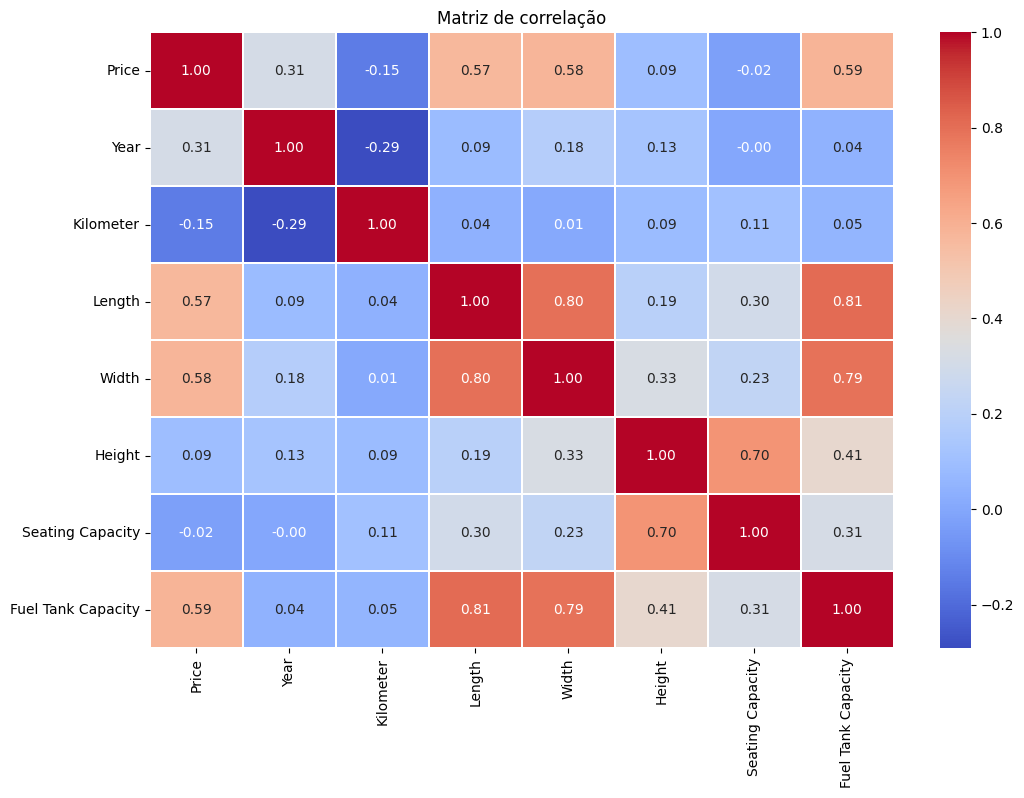

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_car, annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.3)
plt.title('Matriz de correlação')
plt.show()

##Correlações:
##Positivas = Comprimento, largura e capacidade do tanque
##Negativas =  km
##Neutras = Altura

8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse Price.


#Casas

In [35]:
num_casas = num_casas.drop(columns=['id','zipcode'])

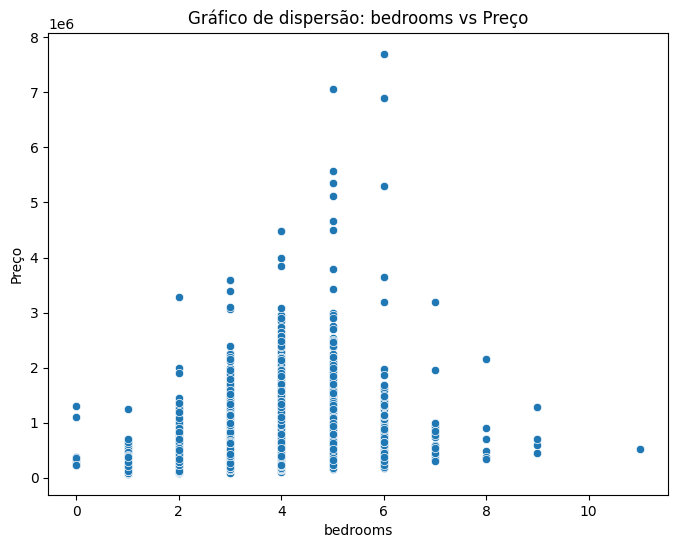

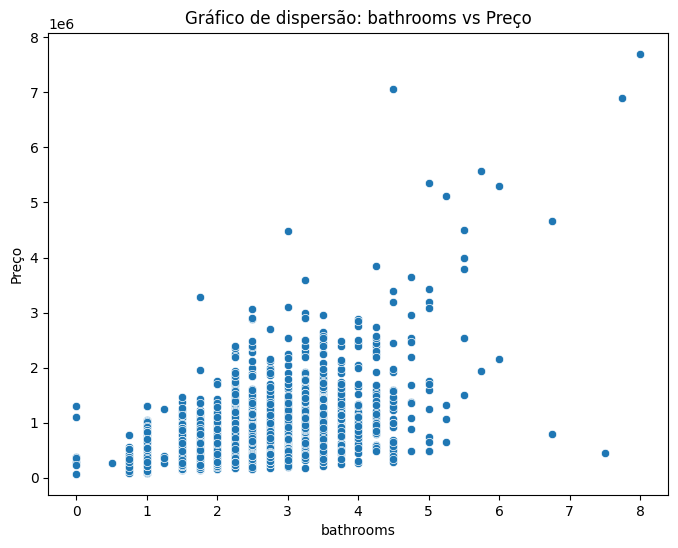

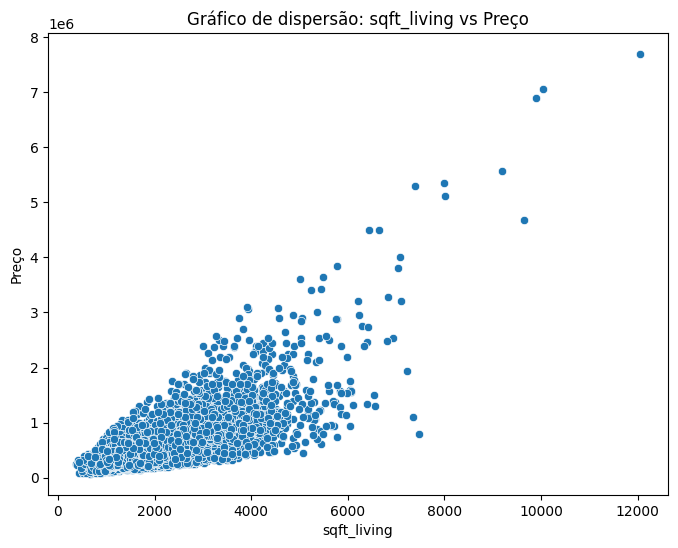

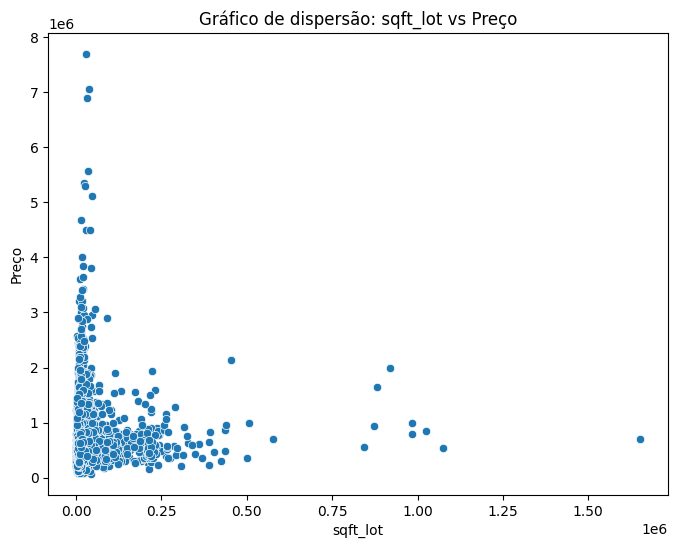

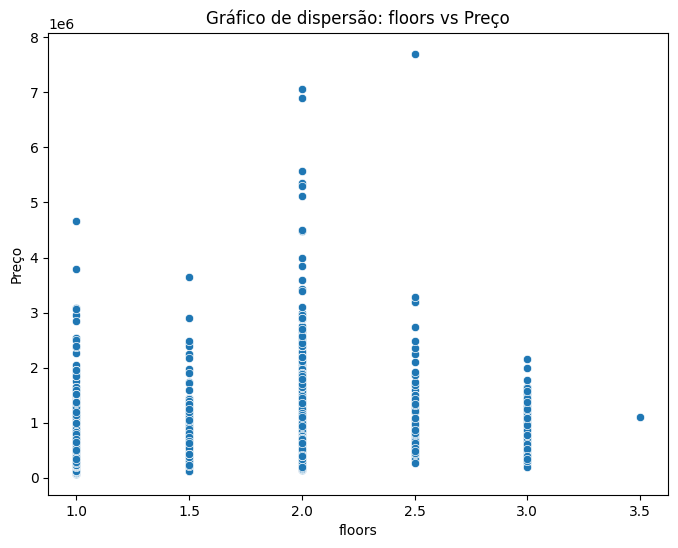

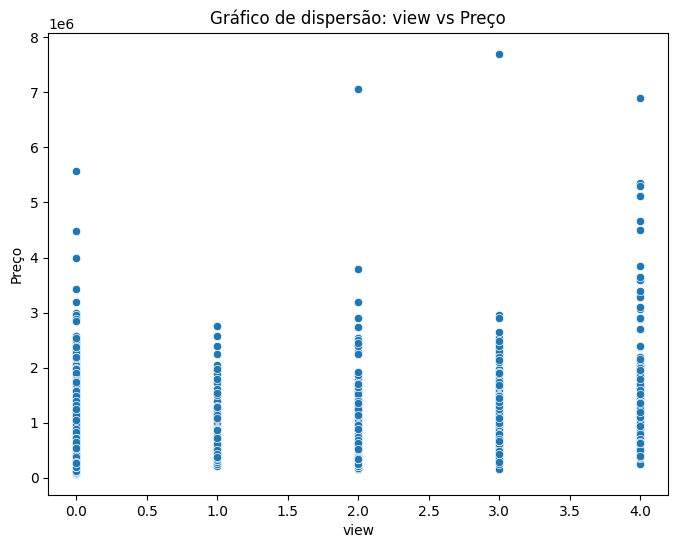

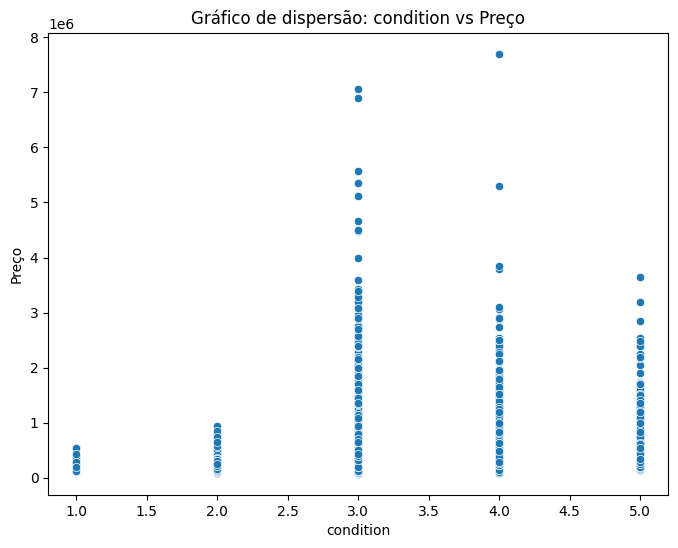

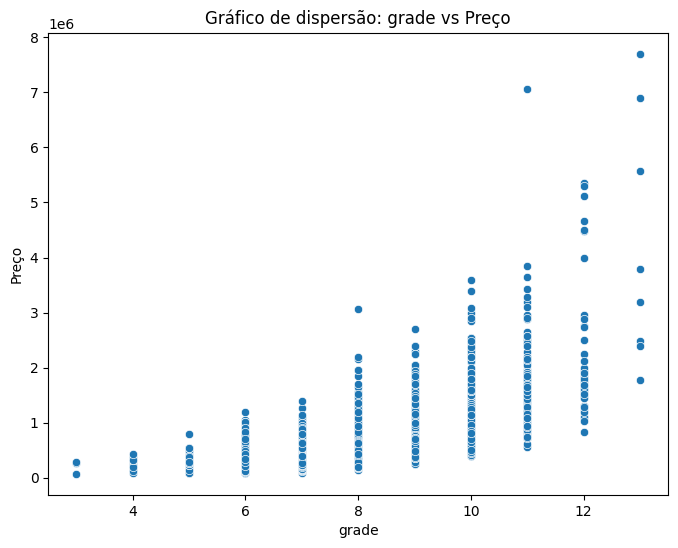

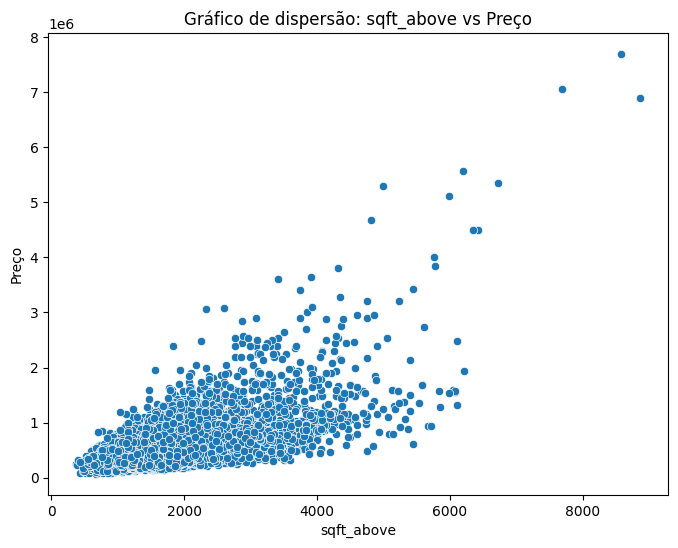

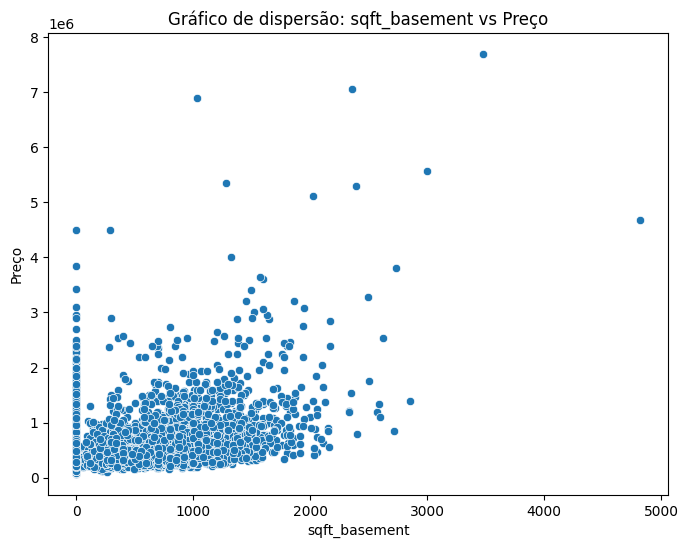

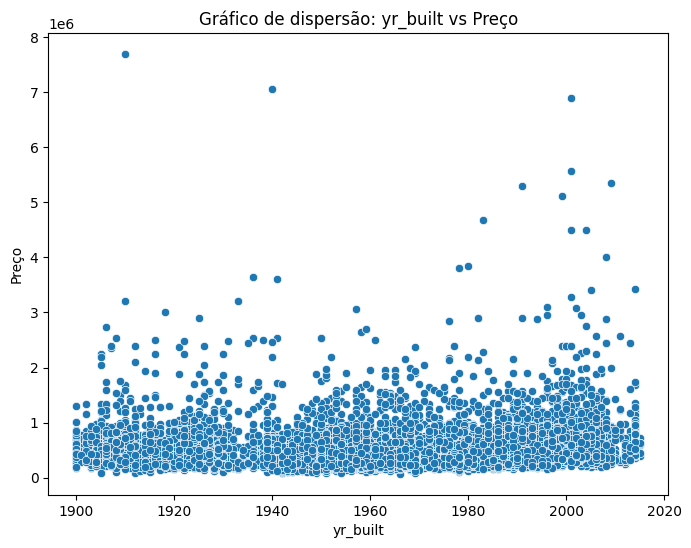

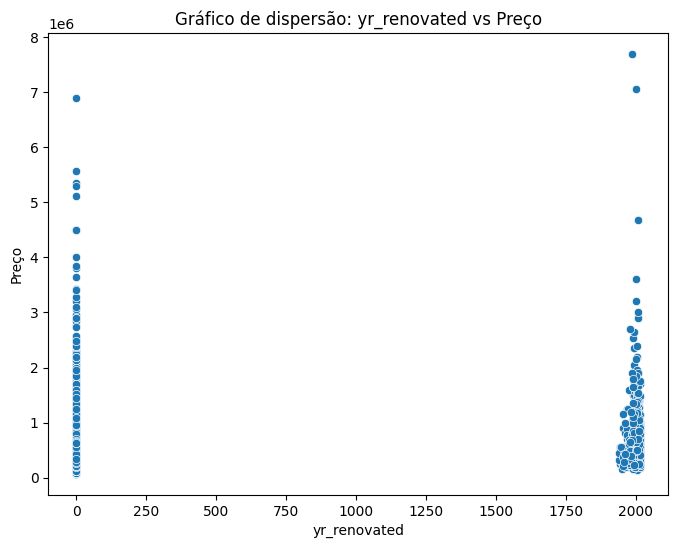

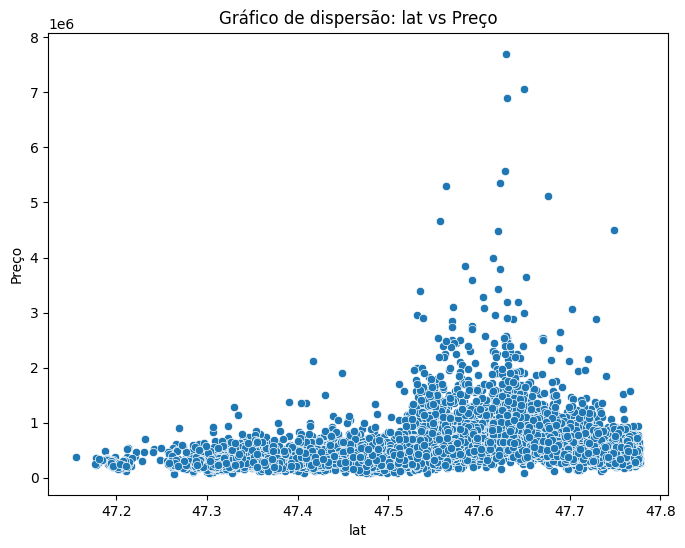

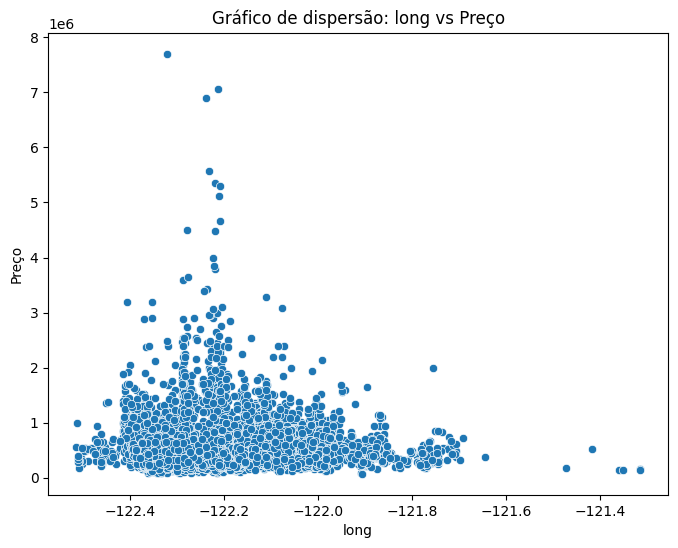

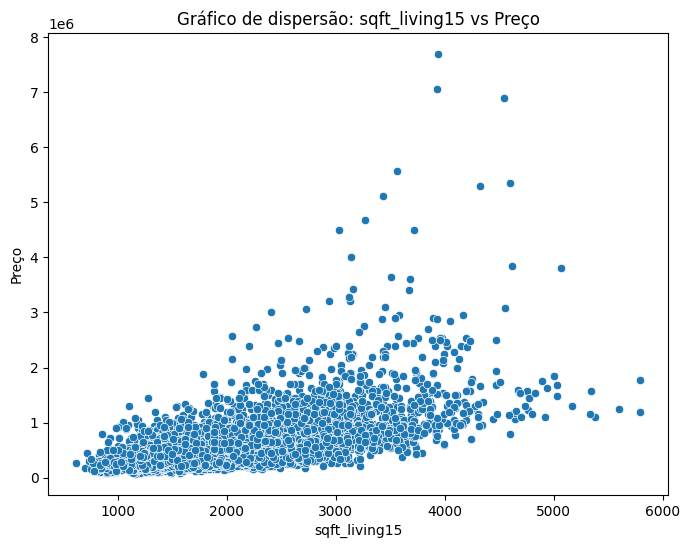

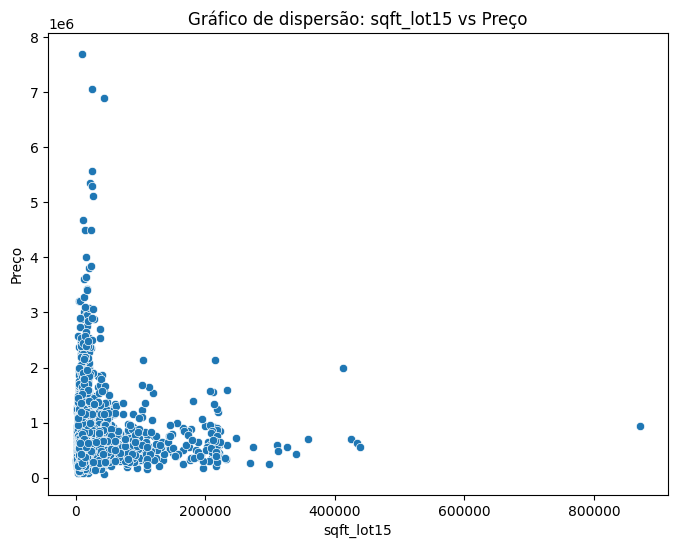

In [36]:
for coluna in num_casas.columns:
    if coluna != 'price':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=num_casas, x=coluna, y="price")
        plt.title(f'Gráfico de dispersão: {coluna} vs Preço')
        plt.xlabel(coluna)
        plt.ylabel("Preço")
        plt.show()

#Carros

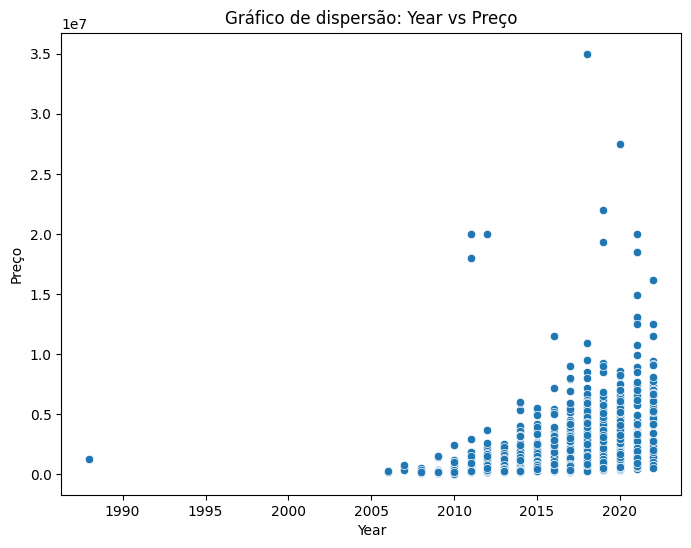

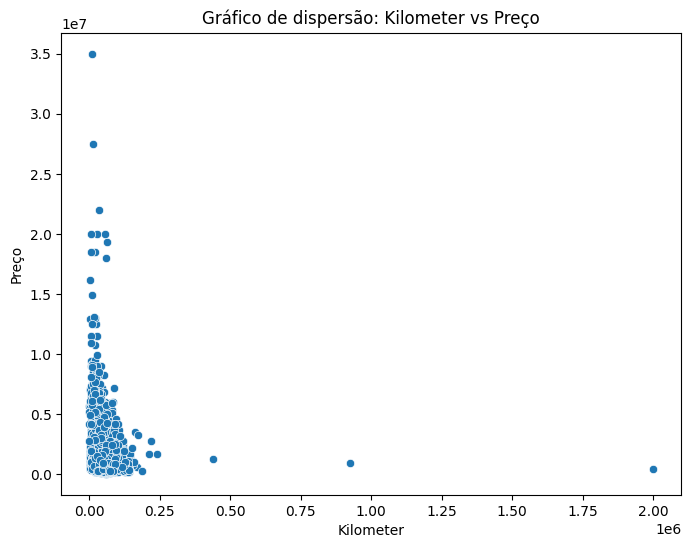

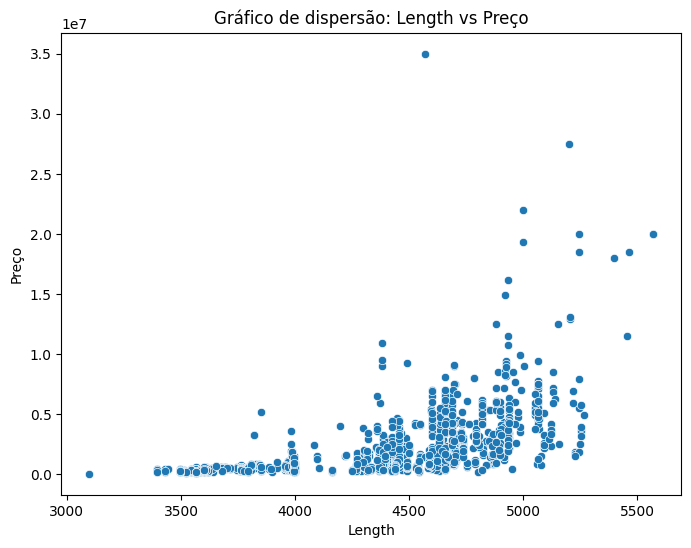

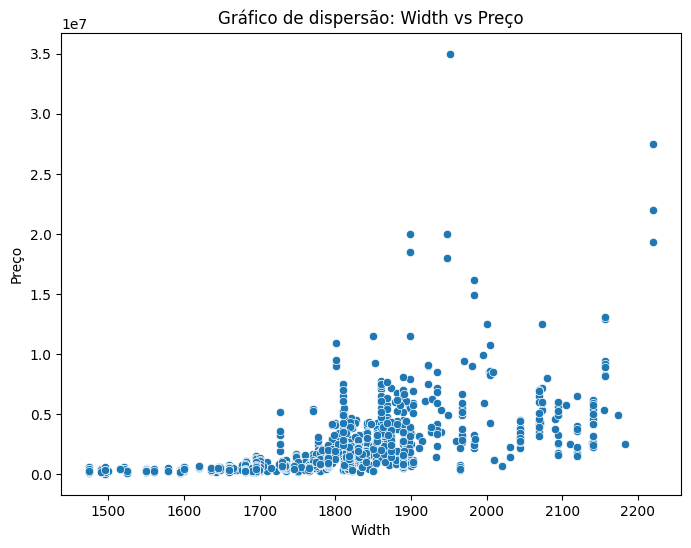

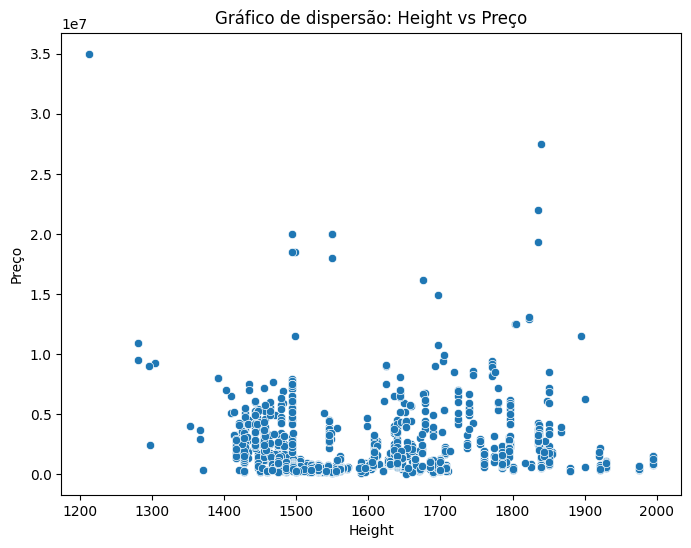

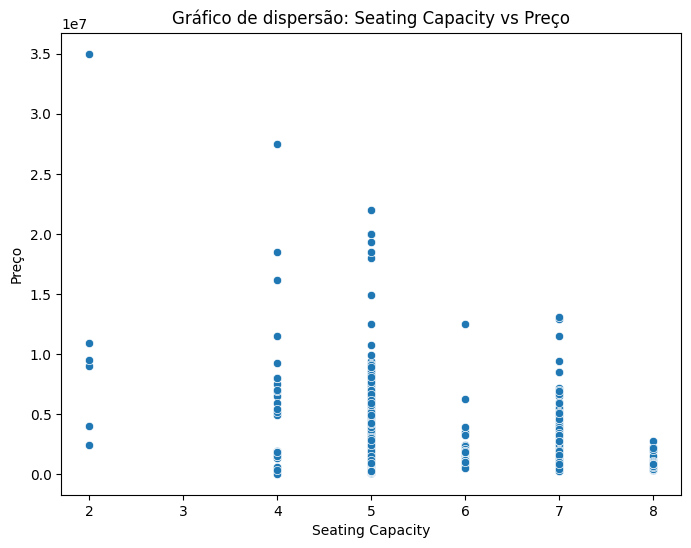

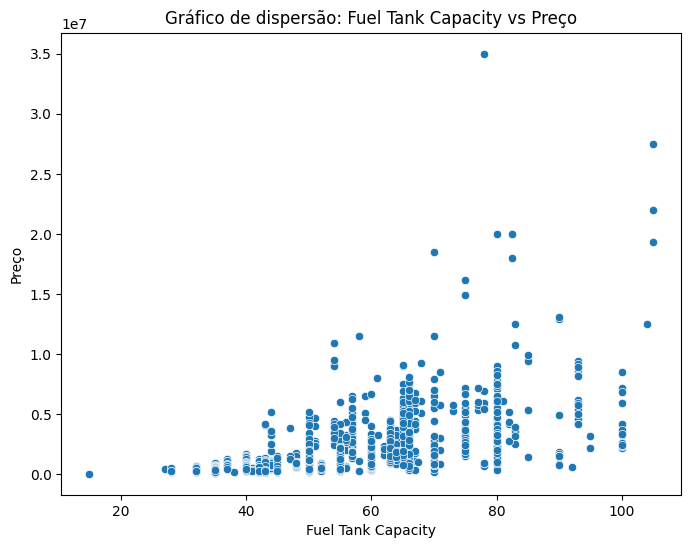

In [55]:
for coluna in num_carros.columns:
    if coluna != 'Price':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=num_carros, x=coluna, y="Price")
        plt.title(f'Gráfico de dispersão: {coluna} vs Preço')
        plt.xlabel(coluna)
        plt.ylabel("Preço")
        plt.show()

9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.

#Casas - Variável utilizada: sqft_living

In [37]:
X = casas['sqft_living']
Y = casas['price']
X = sm.add_constant(X)

In [38]:
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     9724.
Date:                Sat, 11 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:20:45   Log-Likelihood:            -1.3918e+05
No. Observations:                9999   AIC:                         2.784e+05
Df Residuals:                    9997   BIC:                         2.784e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.311e+04   6618.505     -9.536      

<Axes: xlabel='sqft_living', ylabel='price'>

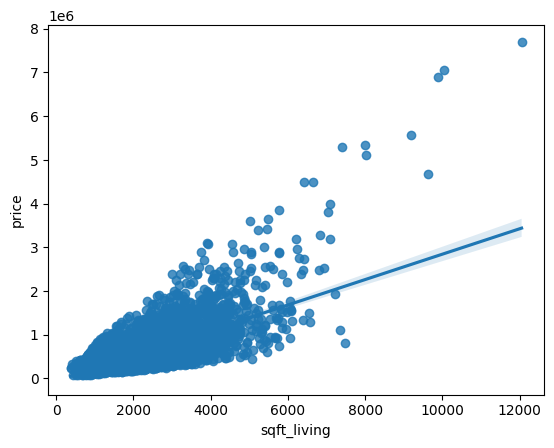

In [39]:
var = 'sqft_living'
sns.regplot(x=var, y='price', data=casas)

#Carros - Variável utilizada: fue tank capacity

In [56]:
carros.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [57]:
X = carros['Fuel Tank Capacity']
Y = carros['Price']
X = sm.add_constant(X)

In [58]:
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     979.6
Date:                Sat, 11 Jan 2025   Prob (F-statistic):          2.59e-173
Time:                        17:33:03   Log-Likelihood:                -29815.
No. Observations:                1874   AIC:                         5.963e+04
Df Residuals:                    1872   BIC:                         5.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.177e+06   1.63

10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão
Simples.

#Casas


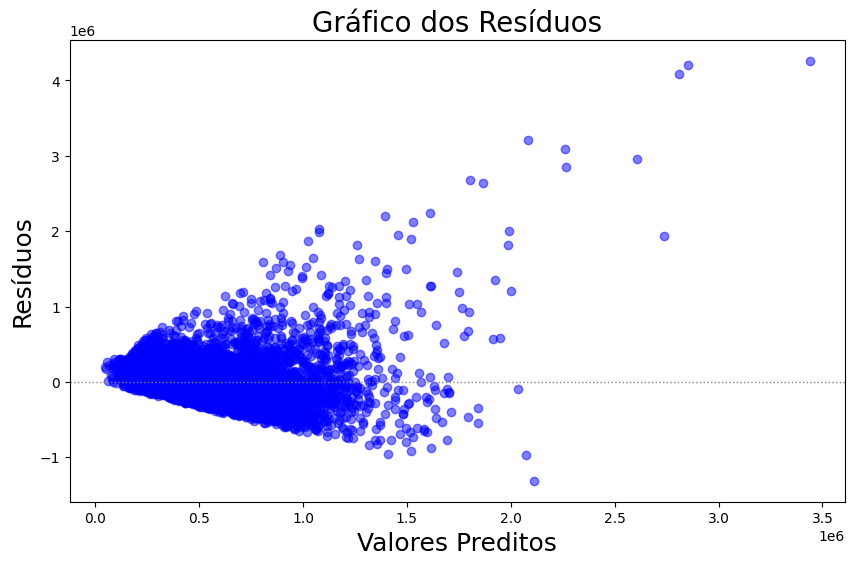

In [40]:
y = model.predict(X)
residuals = Y - y

# Plotar os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='grey', linestyle=':', lw=1)
plt.xlabel('Valores Preditos', fontsize=18)
plt.ylabel('Resíduos', fontsize=18)
plt.title('Gráfico dos Resíduos', fontsize=20)
plt.show()

#Carros

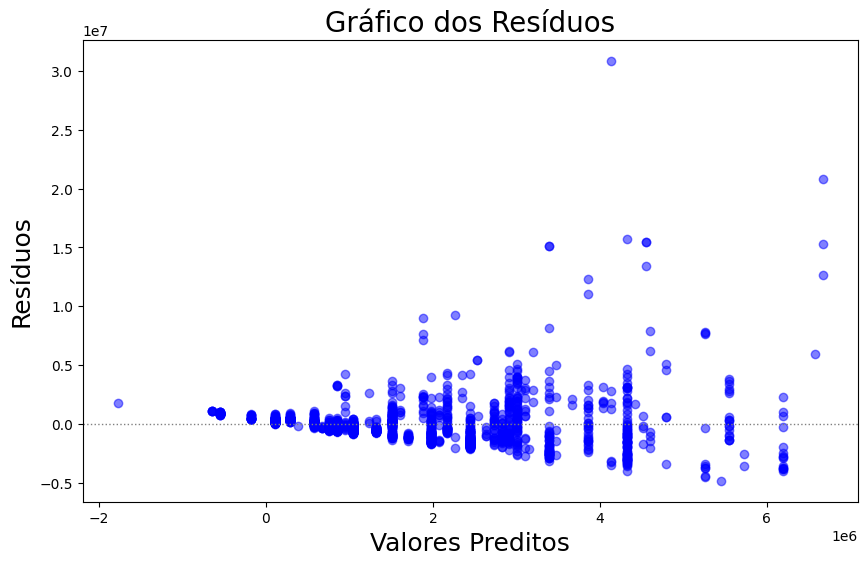

In [59]:
y = model.predict(X)
residuals = Y - y

# Plotar os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='grey', linestyle=':', lw=1)
plt.xlabel('Valores Preditos', fontsize=18)
plt.ylabel('Resíduos', fontsize=18)
plt.title('Gráfico dos Resíduos', fontsize=20)
plt.show()

11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão
e exiba o gráfico dos resíduos do modelo.

#Casas

In [84]:
remover = ['zipcode','lat','long','id','date','price']
num_casas = casas.drop(columns=remover)
num_casas = num_casas.select_dtypes(include=['float64','int64'])

In [85]:
# Adicionar uma constante ao modelo
X = sm.add_constant(num_casas)
Y = casas['price']
mv_model = sm.OLS(Y, X).fit()
print(mv_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1332.
Date:                Sat, 11 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:57:30   Log-Likelihood:            -1.3755e+05
No. Observations:                9999   AIC:                         2.751e+05
Df Residuals:                    9985   BIC:                         2.752e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.814e+06   2.15e+05     31.637

# removendo as variáveis com P>|t| > 0.05

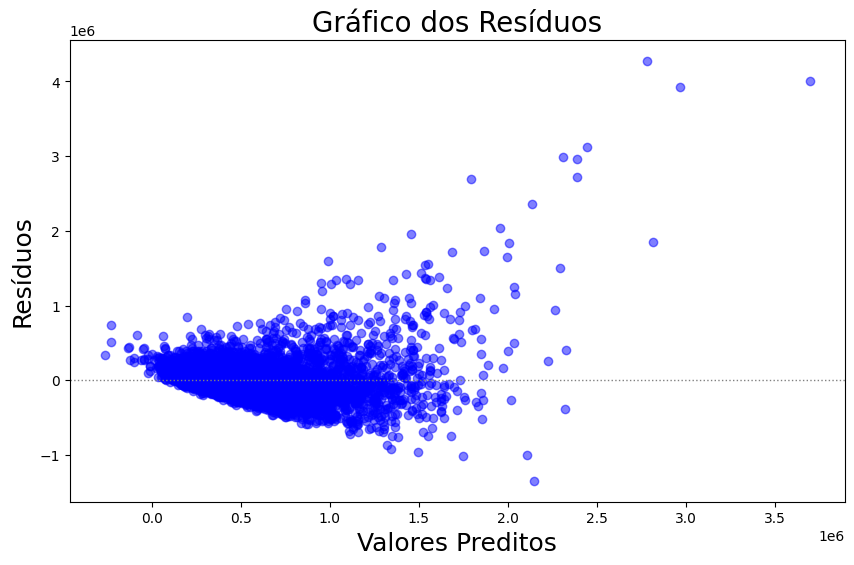

In [83]:
# Calcular os valores preditos e os resíduos
y = mv_model.predict(X)
residuals = Y - y

# Plotar os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='grey', linestyle=':', lw=1)
plt.xlabel('Valores Preditos', fontsize=18)
plt.ylabel('Resíduos', fontsize=18)
plt.title('Gráfico dos Resíduos', fontsize=20)
plt.show()

#Carros

In [88]:
remover_car = ['Price']
num_carros = carros.drop(columns=remover_car)
num_carros = num_carros.select_dtypes(include=['float64','int64'])

In [89]:
X = sm.add_constant(num_carros)
Y = carros['Price']
mv_model = sm.OLS(Y, X).fit()
print(mv_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     270.7
Date:                Sat, 11 Jan 2025   Prob (F-statistic):          1.49e-278
Time:                        17:58:46   Log-Likelihood:                -29553.
No. Observations:                1874   AIC:                         5.912e+04
Df Residuals:                    1866   BIC:                         5.917e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.677e+08   2.77

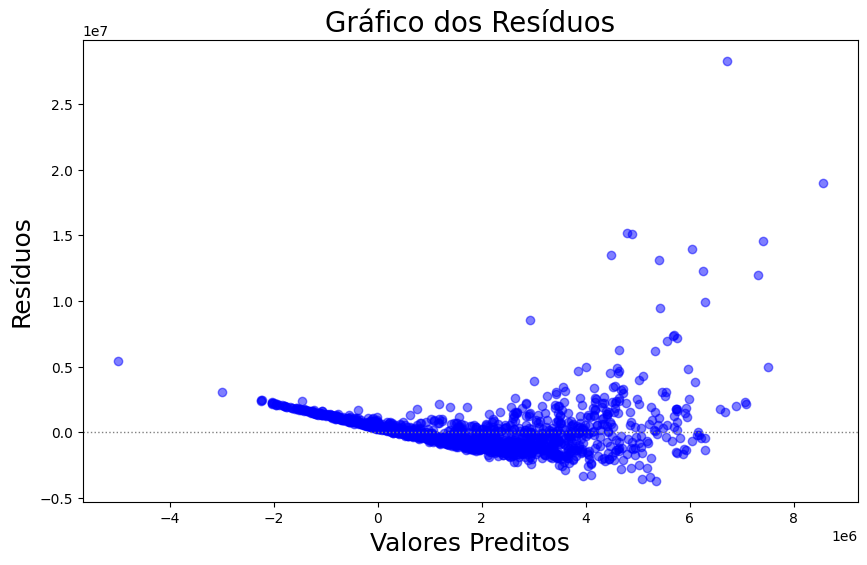

In [90]:
y = mv_model.predict(X)
residuals = Y - y

# Plotar os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='grey', linestyle=':', lw=1)
plt.xlabel('Valores Preditos', fontsize=18)
plt.ylabel('Resíduos', fontsize=18)
plt.title('Gráfico dos Resíduos', fontsize=20)
plt.show()